Stock Portfolio Creator

In [36]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# Get user input for the stock symbol
symbol1 = input("Enter the stock symbol: ")
print(symbol1)

symbol2= input("Enter the second stock symbol: ")
print(symbol2)

years = 5
print(years)

O
IIPR
5


In [38]:
# Create a Ticker object for the first stock
stock_data1 = yf.Ticker(symbol1)

# Fetch dividend, sector, and market cap information for the first stock
dividends1 = stock_data1.dividends
sector1 = stock_data1.info.get('sector')
market_cap1 = stock_data1.info.get('marketCap')

# Check if market_cap is not None before performing conversion for the first stock
if market_cap1 is not None:
    market_cap_million1 = f"${market_cap1 / 1e6:.2f}M"
else:
    market_cap_million1 = None

# Get the most recent dividend if available for the first stock
dividend_amount1 = dividends1.tail(1).iloc[0] if not dividends1.empty else None

# Create a DataFrame with the fetched information for the first stock
stock_info_df1 = pd.DataFrame({
    'Stock': [symbol1],
    'Dividend': [dividend_amount1],
    'Sector': [sector1],
    'Market Cap (Million)': [market_cap_million1]
})

# Create a Ticker object for the second stock
stock_data2 = yf.Ticker(symbol2)

# Fetch dividend, sector, and market cap information for the second stock
dividends2 = stock_data2.dividends
sector2 = stock_data2.info.get('sector')
market_cap2 = stock_data2.info.get('marketCap')

# Check if market_cap is not None before performing conversion for the second stock
if market_cap2 is not None:
    market_cap_million2 = f"${market_cap2 / 1e6:.2f}M"
else:
    market_cap_million2 = None

# Get the most recent dividend if available for the second stock
dividend_amount2 = dividends2.tail(1).iloc[0] if not dividends2.empty else None

# Create a DataFrame with the fetched information for the second stock
stock_info_df2 = pd.DataFrame({
    'Stock': [symbol2],
    'Dividend': [dividend_amount2],
    'Sector': [sector2],
    'Market Cap (Million)': [market_cap_million2]
})

# Combine both DataFrames into one
combined_stock_info_df = pd.concat([stock_info_df1, stock_info_df2], ignore_index=True)

# Print the combined stock information table
print(combined_stock_info_df)


  Stock  Dividend       Sector Market Cap (Million)
0     O     0.263  Real Estate           $47448.48M
1  IIPR     1.820  Real Estate            $3114.23M


Percentage change in closing price over the past 5 years for O: -2.24%

Percentage change in closing price over the past 5 years for IIPR: 55.28%


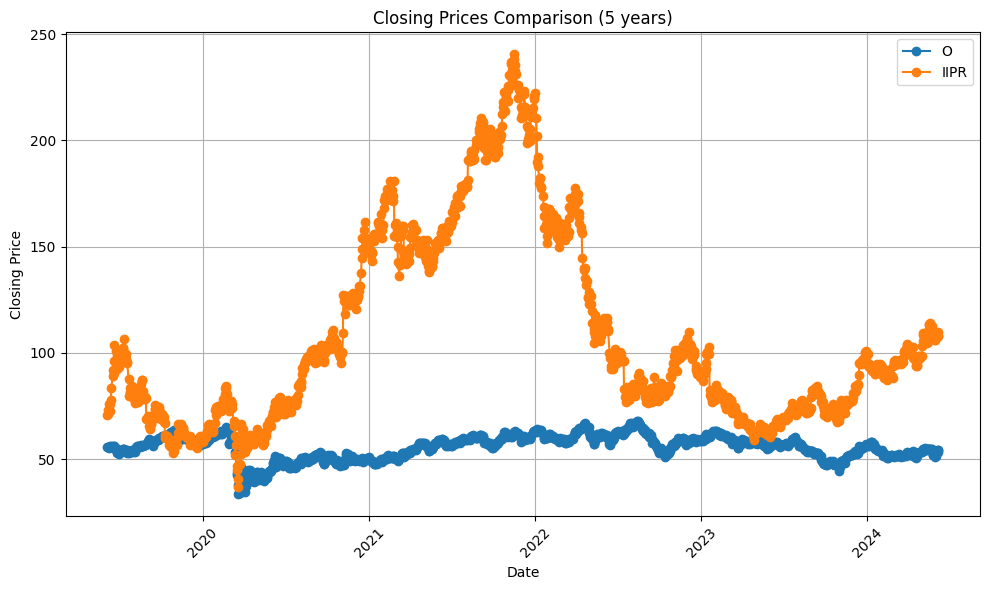

In [39]:

# Create a Ticker object for the first stock
stock_data1 = yf.Ticker(symbol1)

# Fetch historical data for the first stock
data1 = stock_data1.history(period=f"{years}y")

# Fetch historical data for the first stock
data1 = stock_data1.history(period=f"{years}y")

# Calculate percentage change in closing price over the specified years for the first stock
start_price1 = data1['Close'].iloc[0]
end_price1 = data1['Close'].iloc[-1]
percentage_change1 = ((end_price1 - start_price1) / start_price1) * 100

# Print the percentage change for the first stock
print(f"Percentage change in closing price over the past {years} years for {symbol1}: {percentage_change1:.2f}%")

# Create a Ticker object for the second stock
stock_data2 = yf.Ticker(symbol2)

# Fetch historical data for the second stock
data2 = stock_data2.history(period=f"{years}y")

# Calculate percentage change in closing price over the specified years for the second stock
start_price2 = data2['Close'].iloc[0]
end_price2 = data2['Close'].iloc[-1]
percentage_change2 = ((end_price2 - start_price2) / start_price2) * 100

# Print the percentage change for the second stock
print(f"\nPercentage change in closing price over the past {years} years for {symbol2}: {percentage_change2:.2f}%")

# Create a Ticker object for the second stock
stock_data2 = yf.Ticker(symbol2)

# Fetch historical data for the second stock
data2 = stock_data2.history(period=f"{years}y")

# Plotting closing prices for both stocks on one graph
plt.figure(figsize=(10, 6))
plt.plot(data1.index, data1['Close'], marker='o', linestyle='-', label=symbol1)
plt.plot(data2.index, data2['Close'], marker='o', linestyle='-', label=symbol2)
plt.title(f"Closing Prices Comparison ({years} years)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

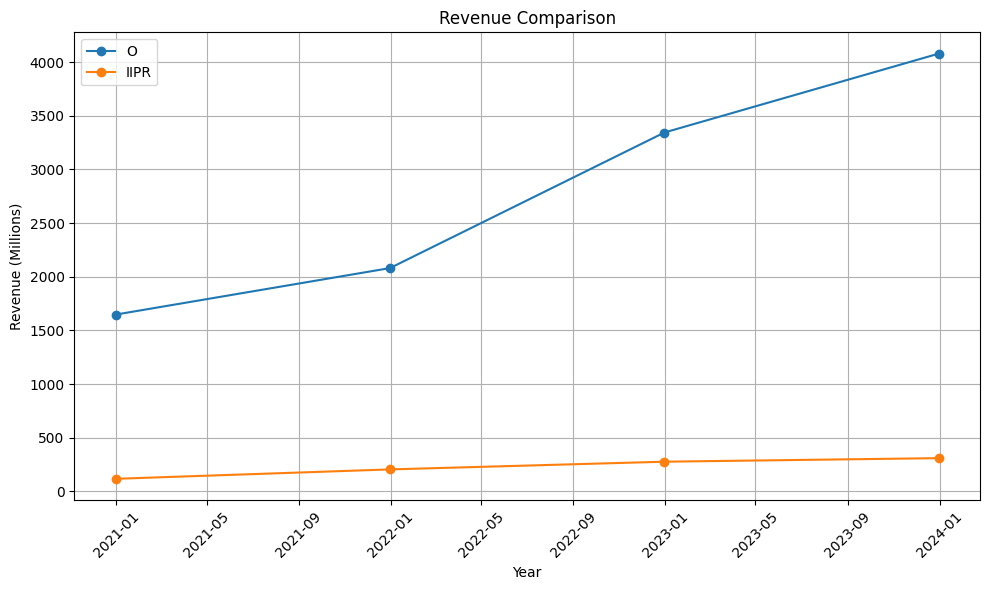

Income Statements for O:
Year: 2023-12-31 00:00:00, Revenue: 4078.99 million
Year: 2022-12-31 00:00:00, Revenue: 3343.68 million
Year: 2021-12-31 00:00:00, Revenue: 2080.46 million
Year: 2020-12-31 00:00:00, Revenue: 1647.09 million
Year: 2019-12-31 00:00:00, Revenue: nan million
Income Statements for IIPR:
Year: 2023-12-31 00:00:00, Revenue: 309.51 million
Year: 2022-12-31 00:00:00, Revenue: 276.36 million
Year: 2021-12-31 00:00:00, Revenue: 204.55 million
Year: 2020-12-31 00:00:00, Revenue: 116.90 million
Year: 2019-12-31 00:00:00, Revenue: nan million


/var/folders/l2/llz9_pnx1x500g8s68zv1r8r0000gp/T/ipykernel_35722/50275909.py:34: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for year, revenue in revenue_millions1.iteritems():
/var/folders/l2/llz9_pnx1x500g8s68zv1r8r0000gp/T/ipykernel_35722/50275909.py:39: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for year, revenue in revenue_millions2.iteritems():


In [40]:
# Create a Ticker object for the first stock
stock_data1 = yf.Ticker(symbol1)

# Fetch income statement data for the first stock
income_statement1 = stock_data1.financials.loc['Total Revenue']

# Convert revenue to millions for the first stock
revenue_millions1 = income_statement1 / 1e6

# Create a Ticker object for the second stock
stock_data2 = yf.Ticker(symbol2)

# Fetch income statement data for the second stock
income_statement2 = stock_data2.financials.loc['Total Revenue']

# Convert revenue to millions for the second stock
revenue_millions2 = income_statement2 / 1e6

# Plotting income statements for both stocks on one graph
plt.figure(figsize=(10, 6))
plt.plot(revenue_millions1.index, revenue_millions1, marker='o', linestyle='-', label=symbol1)
plt.plot(revenue_millions2.index, revenue_millions2, marker='o', linestyle='-', label=symbol2)
plt.title("Revenue Comparison")
plt.xlabel("Year")
plt.ylabel("Revenue (Millions)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print the income statements for each year for the first stock
print("Income Statements for", symbol1 + ":")
for year, revenue in revenue_millions1.iteritems():
    print(f"Year: {year}, Revenue: {revenue:.2f} million")

# Print the income statements for each year for the second stock
print("Income Statements for", symbol2 + ":")
for year, revenue in revenue_millions2.iteritems():
    print(f"Year: {year}, Revenue: {revenue:.2f} million")


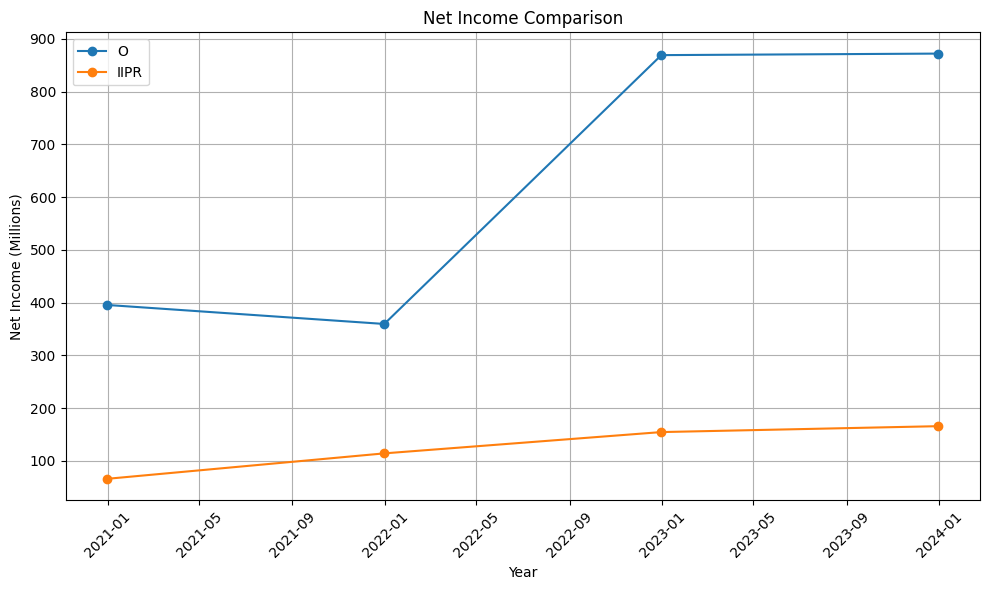

Net Income for O:
Year: 2023-12-31 00:00:00, Net Income: 872.31 million
Year: 2022-12-31 00:00:00, Net Income: 869.41 million
Year: 2021-12-31 00:00:00, Net Income: 359.46 million
Year: 2020-12-31 00:00:00, Net Income: 395.49 million
Year: 2019-12-31 00:00:00, Net Income: nan million
Net Income for IIPR:
Year: 2023-12-31 00:00:00, Net Income: 165.59 million
Year: 2022-12-31 00:00:00, Net Income: 154.39 million
Year: 2021-12-31 00:00:00, Net Income: 113.99 million
Year: 2020-12-31 00:00:00, Net Income: 65.73 million
Year: 2019-12-31 00:00:00, Net Income: nan million


/var/folders/l2/llz9_pnx1x500g8s68zv1r8r0000gp/T/ipykernel_35722/1232944971.py:34: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for year, income in net_income_millions1.iteritems():
/var/folders/l2/llz9_pnx1x500g8s68zv1r8r0000gp/T/ipykernel_35722/1232944971.py:39: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for year, income in net_income_millions2.iteritems():


In [41]:
# Create a Ticker object for the first stock
stock_data1 = yf.Ticker(symbol1)

# Fetch income statement data for the first stock (Net Income)
net_income1 = stock_data1.financials.loc['Net Income']

# Convert net income to millions for the first stock
net_income_millions1 = net_income1 / 1e6

# Create a Ticker object for the second stock
stock_data2 = yf.Ticker(symbol2)

# Fetch income statement data for the second stock (Net Income)
net_income2 = stock_data2.financials.loc['Net Income']

# Convert net income to millions for the second stock
net_income_millions2 = net_income2 / 1e6

# Plotting net income for both stocks on one graph
plt.figure(figsize=(10, 6))
plt.plot(net_income_millions1.index, net_income_millions1, marker='o', linestyle='-', label=symbol1)
plt.plot(net_income_millions2.index, net_income_millions2, marker='o', linestyle='-', label=symbol2)
plt.title("Net Income Comparison")
plt.xlabel("Year")
plt.ylabel("Net Income (Millions)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print the net income for each year for the first stock
print("Net Income for", symbol1 + ":")
for year, income in net_income_millions1.iteritems():
    print(f"Year: {year}, Net Income: {income:.2f} million")

# Print the net income for each year for the second stock
print("Net Income for", symbol2 + ":")
for year, income in net_income_millions2.iteritems():
    print(f"Year: {year}, Net Income: {income:.2f} million")

In [42]:
stock_data = yf.Ticker(symbol1)

institutional_holders = stock_data.get_institutional_holders()


# Print the stock information table
print(institutional_holders)

# Create a Ticker object for the stock
stock_data = yf.Ticker(symbol2)

institutional_holders2 = stock_data.get_institutional_holders()


# Print the stock information table
print(institutional_holders2)



  Date Reported                         Holder  pctHeld     Shares       Value
0    2023-06-30             Vanguard Group Inc   0.1505  106701193  6379664329
1    2023-06-30                 Blackrock Inc.   0.0872   61840542  3697446006
2    2023-06-30       State Street Corporation   0.0729   51642575  3087709559
3    2023-06-30            Cohen & Steers Inc.   0.0639   45307933  2708961314
4    2023-06-30    Bank of America Corporation   0.0337   23901225  1429054242
5    2023-06-30  Geode Capital Management, LLC   0.0221   15645964   935472187
6    2023-06-30                   Invesco Ltd.   0.0165   11670826   697798686
7    2023-06-30                 Morgan Stanley   0.0164   11593920   693200476
8    2023-06-30      JP Morgan Chase & Company   0.0156   11048481   660588678
9    2023-06-30    Daiwa Securities Group Inc.   0.0129    9153965   547315567


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


  Date Reported                                      Holder  pctHeld   Shares  \
0    2023-06-30                              Blackrock Inc.   0.1785  5003990   
1    2023-06-30                          Vanguard Group Inc   0.1577  4420908   
2    2023-06-30                    State Street Corporation   0.0611  1712372   
3    2023-06-30                         Zimmer Partners, Lp   0.0441  1237500   
4    2023-03-31                     ETF Managers Group, LLC   0.0135   377796   
5    2023-06-30  Charles Schwab Investment Management, Inc.   0.0125   351474   
6    2023-06-30                  Northern Trust Corporation   0.0118   329763   
7    2023-06-30         Bank Of New York Mellon Corporation   0.0113   316682   
8    2023-06-30                              Morgan Stanley   0.0108   303735   
9    2023-06-30                   Legal & General Group PLC   0.0089   250462   

       Value  
0  365341309  
1  322770493  
2  125020279  
3   90349875  
4   28708718  
5   25661116  
6  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)
